In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
%matplotlib inline
import pandas as pd

In [2]:
data = pd.read_csv('data_infl_ineq.csv', delimiter=',', encoding = 'utf-8') # Считываем данные из файла. 
data

,Unnamed: 0,X.4,X,Year,Region,FedOk,Gini,R.P.10,Dec_coef,Infl_all,...,TAv_sub_real,G_s,avGRP08,Sd_infl,Infl2,G1,G2,G3,G4,G5
0,1,1,14,2008,Российская Федерация,0,0.421,16.6,NaN,13.281658,...,0.269549,0.244011,3.605256,0.491044,176.402442,5.1,9.8,14.8,22.5,47.8
1,2,2,15,2009,Российская Федерация,0,0.421,16.6,NaN,8.797004,...,0.323091,0.248692,3.605256,0.698798,77.387281,5.2,9.8,14.8,22.5,47.7
2,3,3,16,2010,Российская Федерация,0,0.421,16.6,NaN,8.776659,...,0.363408,0.243909,3.605256,0.361973,77.029738,5.2,9.8,14.8,22.5,47.7
3,4,4,17,2011,Российская Федерация,0,0.417,16.2,NaN,6.100638,...,0.393426,0.237000,3.605256,0.630969,37.217778,5.2,9.9,14.9,22.6,47.4
4,5,5,18,2012,Российская Федерация,0,0.420,16.4,NaN,6.575650,...,0.371645,0.231000,3.605256,0.277402,43.239173,5.2,9.8,14.9,22.5,47.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,756,756,1987,2013,Чукотский авт. округ,8,0.417,16.1,NaN,5.236578,...,0.495450,0.785614,9.989451,NaN,27.421745,5.2,9.9,14.9,22.6,47.4
756,757,757,1988,2014,Чукотский авт. округ,8,0.398,16.1,NaN,3.981287,...,0.459167,1.005596,9.989451,NaN,15.850646,5.2,9.9,14.9,22.6,47.4
757,758,758,1989,2015,Чукотский авт. округ,8,0.411,15.5,NaN,11.051085,...,0.448204,0.911016,9.989451,NaN,122.126479,5.3,10.1,15.1,22.6,46.9
758,759,759,1990,2016,Чукотский авт. округ,8,0.407,15.0,NaN,5.881662,...,0.451743,0.931646,9.989451,NaN,34.593951,5.4,10.2,15.1,22.7,46.6


In [3]:
data1 = data[['Year','Region', 'Gini', 'Infl_all', 'Infl2', 'GRP', 'GRP2', 'Unempl', 'YAv_sub_real', 'G_s']]  
data1

,Year,Region,Gini,Infl_all,Infl2,GRP,GRP2,Unempl,YAv_sub_real,G_s
0,2008,Российская Федерация,0.421,13.281658,176.402442,2.375522,5.643105,6.2,3234.592486,0.244011
1,2009,Российская Федерация,0.421,8.797004,77.387281,2.241633,5.024919,8.3,3877.090764,0.248692
2,2010,Российская Федерация,0.421,8.776659,77.029738,2.638286,6.960553,7.3,4360.901502,0.243909
3,2011,Российская Федерация,0.417,6.100638,37.217778,3.175153,10.081597,6.5,4721.111219,0.237000
4,2012,Российская Федерация,0.420,6.575650,43.239173,3.486415,12.155090,5.5,4459.743250,0.231000
...,...,...,...,...,...,...,...,...,...,...
755,2013,Чукотский авт. округ,0.417,5.236578,27.421745,8.776128,77.020423,3.3,5945.403224,0.785614
756,2014,Чукотский авт. округ,0.398,3.981287,15.850646,11.425041,130.531562,3.2,5510.000177,1.005596
757,2015,Чукотский авт. округ,0.411,11.051085,122.126479,12.261520,150.344873,4.0,5378.446907,0.911016
758,2016,Чукотский авт. округ,0.407,5.881662,34.593951,13.543677,183.431187,3.5,5420.911660,0.931646


Задача - построить модель влияния инфляции на неравенство в России
## Описание переменных

*Year* – Год

*Region* – Название субъекта

*Gini* – Коэффициент Джини

*Infl_all* – Годовая общая инфляция, п.п.

*Infl2* – Квадрат *Infl_all*

*GRP* – Валовой региональный продукт на душу населения, в ном. выражении, сотни тыс. руб.

*GRP2* – Квадрат *GRP*

*Unempl* – Уровень безработицы

*YAv_sub_real* – Годовой размер социальной поддержки на одного пользователя, в ном. выражении (в реальном
выражении), руб.

*G_s* – Численность работников государственных органов и органов местного самоуправления на 1000 человек занятых в экономике 


In [4]:
data1 = data1.drop(data1[data1.Region == 'Российская Федерация'].index)
data1

,Year,Region,Gini,Infl_all,Infl2,GRP,GRP2,Unempl,YAv_sub_real,G_s
10,2008,Белгородская область,0.401,13.597456,184.890822,2.085481,4.349231,3.9,3218.491026,0.285842
11,2009,Белгородская область,0.402,8.945323,80.018806,1.990461,3.961935,4.7,3296.598169,0.284204
12,2010,Белгородская область,0.403,9.026827,81.483599,2.600156,6.760811,5.2,3189.491035,0.280545
13,2011,Белгородская область,0.402,5.527599,30.554354,3.310100,10.956762,4.3,3299.176163,0.275000
14,2012,Белгородская область,0.410,6.244222,38.990306,3.545706,12.572031,3.7,3258.921362,0.272000
...,...,...,...,...,...,...,...,...,...,...
755,2013,Чукотский авт. округ,0.417,5.236578,27.421745,8.776128,77.020423,3.3,5945.403224,0.785614
756,2014,Чукотский авт. округ,0.398,3.981287,15.850646,11.425041,130.531562,3.2,5510.000177,1.005596
757,2015,Чукотский авт. округ,0.411,11.051085,122.126479,12.261520,150.344873,4.0,5378.446907,0.911016
758,2016,Чукотский авт. округ,0.407,5.881662,34.593951,13.543677,183.431187,3.5,5420.911660,0.931646


In [5]:
Dummies = pd.get_dummies(data1['Region']) 
Dummies

,Алтайский край,Амурская область,Архангельская область,Астраханская область,Белгородская область,Брянская область,Владимирская область,Волгоградская область,Вологодская область,Воронежская область,...,Тульская область,Тюменская область,Удмуртская Республика,Хабаровский край,Челябинская область,Чувашская Республика,Чукотский авт. округ,Ярославская область,г. Cанкт-Петербург,г. Москва
10,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
Dummies2 = pd.get_dummies(data1['Year']) 
Dummies2

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
10,1,0,0,0,0,0,0,0,0,0
11,0,1,0,0,0,0,0,0,0,0
12,0,0,1,0,0,0,0,0,0,0
13,0,0,0,1,0,0,0,0,0,0
14,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
755,0,0,0,0,0,1,0,0,0,0
756,0,0,0,0,0,0,1,0,0,0
757,0,0,0,0,0,0,0,1,0,0
758,0,0,0,0,0,0,0,0,1,0


In [7]:
data2 = pd.concat([data1, Dummies, Dummies2], axis=1) 
data2

,Year,Region,Gini,Infl_all,Infl2,GRP,GRP2,Unempl,YAv_sub_real,G_s,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
10,2008,Белгородская область,0.401,13.597456,184.890822,2.085481,4.349231,3.9,3218.491026,0.285842,...,1,0,0,0,0,0,0,0,0,0
11,2009,Белгородская область,0.402,8.945323,80.018806,1.990461,3.961935,4.7,3296.598169,0.284204,...,0,1,0,0,0,0,0,0,0,0
12,2010,Белгородская область,0.403,9.026827,81.483599,2.600156,6.760811,5.2,3189.491035,0.280545,...,0,0,1,0,0,0,0,0,0,0
13,2011,Белгородская область,0.402,5.527599,30.554354,3.310100,10.956762,4.3,3299.176163,0.275000,...,0,0,0,1,0,0,0,0,0,0
14,2012,Белгородская область,0.410,6.244222,38.990306,3.545706,12.572031,3.7,3258.921362,0.272000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,2013,Чукотский авт. округ,0.417,5.236578,27.421745,8.776128,77.020423,3.3,5945.403224,0.785614,...,0,0,0,0,0,1,0,0,0,0
756,2014,Чукотский авт. округ,0.398,3.981287,15.850646,11.425041,130.531562,3.2,5510.000177,1.005596,...,0,0,0,0,0,0,1,0,0,0
757,2015,Чукотский авт. округ,0.411,11.051085,122.126479,12.261520,150.344873,4.0,5378.446907,0.911016,...,0,0,0,0,0,0,0,1,0,0
758,2016,Чукотский авт. округ,0.407,5.881662,34.593951,13.543677,183.431187,3.5,5420.911660,0.931646,...,0,0,0,0,0,0,0,0,1,0


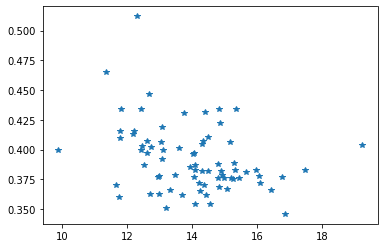

In [8]:
plt.plot( data2.loc[data2[2008] == 1].Infl_all, data2.loc[data2[2008] == 1].Gini, '*') # Диаграмма рассеяния для 2008 года

In [9]:
data2.drop(['Year', 'Region'], inplace=True, axis=1)# Убрали Year и Region
data2

,Gini,Infl_all,Infl2,GRP,GRP2,Unempl,YAv_sub_real,G_s,Алтайский край,Амурская область,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
10,0.401,13.597456,184.890822,2.085481,4.349231,3.9,3218.491026,0.285842,0,0,...,1,0,0,0,0,0,0,0,0,0
11,0.402,8.945323,80.018806,1.990461,3.961935,4.7,3296.598169,0.284204,0,0,...,0,1,0,0,0,0,0,0,0,0
12,0.403,9.026827,81.483599,2.600156,6.760811,5.2,3189.491035,0.280545,0,0,...,0,0,1,0,0,0,0,0,0,0
13,0.402,5.527599,30.554354,3.310100,10.956762,4.3,3299.176163,0.275000,0,0,...,0,0,0,1,0,0,0,0,0,0
14,0.410,6.244222,38.990306,3.545706,12.572031,3.7,3258.921362,0.272000,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,0.417,5.236578,27.421745,8.776128,77.020423,3.3,5945.403224,0.785614,0,0,...,0,0,0,0,0,1,0,0,0,0
756,0.398,3.981287,15.850646,11.425041,130.531562,3.2,5510.000177,1.005596,0,0,...,0,0,0,0,0,0,1,0,0,0
757,0.411,11.051085,122.126479,12.261520,150.344873,4.0,5378.446907,0.911016,0,0,...,0,0,0,0,0,0,0,1,0,0
758,0.407,5.881662,34.593951,13.543677,183.431187,3.5,5420.911660,0.931646,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
data3 = data2.values # Составляем array из data frame
data3

array([[  0.401     ,  13.59745644, 184.89082164, ...,   0.        ,
          0.        ,   0.        ],
       [  0.402     ,   8.94532312,  80.01880567, ...,   0.        ,
          0.        ,   0.        ],
       [  0.403     ,   9.02682662,  81.48359883, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.411     ,  11.05108497, 122.12647901, ...,   1.        ,
          0.        ,   0.        ],
       [  0.407     ,   5.88166223,  34.59395062, ...,   0.        ,
          1.        ,   0.        ],
       [  0.398     ,   2.81659385,   7.93320092, ...,   0.        ,
          0.        ,   1.        ]])

In [11]:
Gini = data3[:,0] # Значения зависимой переменной
Gini

array([0.401, 0.402, 0.403, 0.402, 0.41 , 0.404, 0.393, 0.391, 0.397,
       0.393, 0.383, 0.386, 0.384, 0.385, 0.397, 0.394, 0.381, 0.387,
       0.384, 0.381, 0.354, 0.356, 0.366, 0.364, 0.374, 0.376, 0.352,
       0.362, 0.356, 0.352, 0.407, 0.401, 0.404, 0.404, 0.405, 0.412,
       0.399, 0.411, 0.407, 0.399, 0.354, 0.353, 0.357, 0.359, 0.373,
       0.371, 0.362, 0.358, 0.363, 0.362, 0.382, 0.385, 0.389, 0.39 ,
       0.401, 0.396, 0.364, 0.378, 0.376, 0.364, 0.366, 0.362, 0.365,
       0.361, 0.368, 0.361, 0.358, 0.354, 0.36 , 0.358, 0.383, 0.378,
       0.38 , 0.383, 0.395, 0.391, 0.374, 0.381, 0.381, 0.374, 0.383,
       0.387, 0.386, 0.381, 0.397, 0.4  , 0.389, 0.388, 0.389, 0.389,
       0.416, 0.408, 0.41 , 0.414, 0.42 , 0.417, 0.388, 0.392, 0.397,
       0.388, 0.405, 0.4  , 0.399, 0.399, 0.403, 0.381, 0.368, 0.369,
       0.371, 0.368, 0.376, 0.368, 0.372, 0.365, 0.381, 0.386, 0.371,
       0.374, 0.374, 0.371, 0.377, 0.377, 0.378, 0.368, 0.379, 0.378,
       0.382, 0.372,

In [12]:
data3 = data3[:,1:] #Убрали Gini, остались все переменные, которые могут влиять на неравенство
data3

array([[ 13.59745644, 184.89082164,   2.085481  , ...,   0.        ,
          0.        ,   0.        ],
       [  8.94532312,  80.01880567,   1.990461  , ...,   0.        ,
          0.        ,   0.        ],
       [  9.02682662,  81.48359883,   2.600156  , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [ 11.05108497, 122.12647901,  12.26152   , ...,   1.        ,
          0.        ,   0.        ],
       [  5.88166223,  34.59395062,  13.543677  , ...,   0.        ,
          1.        ,   0.        ],
       [  2.81659385,   7.93320092,  13.860853  , ...,   0.        ,
          0.        ,   1.        ]])

In [13]:
data3.shape

(750, 92)

Создадим функцию для вычисления коэффициентов

In [14]:
def fitLin(x, y):    #Если в правой части 1 регрессор
    s1 = x.shape[0]
    A = np.concatenate( [np.ones((s1,1)), x.reshape( s1, 1) ], axis=1 )
    Ai = np.linalg.pinv(A)
    d = Ai.dot( y.reshape(s1,1) )
    return d

In [15]:
def fitLin1(x, y):    #Если в правой части больше 1 регрессора, то есть есть контрольные переменные
    s1 = x.shape[0]
    s2 = x.shape[1]
    A = np.concatenate( [np.ones((s1,1)), x.reshape( s1, s2) ], axis=1 )
    Ai = np.linalg.pinv(A)
    d = Ai.dot( y.reshape(s1,1) )
    return d

#### Модель 1. Построим сначала самую простую регрессию (неравенство ~ инфляция)

In [16]:
d = fitLin( data3[:,0], Gini) 
print('Константа = ',d[0])
print('Коэффициент перед Infl_all = ',d[1])
d # коэффициент перед инфляцией = 1.13296733e-04

Константа =  [0.38520421]
Коэффициент перед Infl_all =  [0.0001133]


array([[3.85204206e-01],
       [1.13296733e-04]])

(-1.32609652495, 21.01552840595, 0.3166, 0.5234)

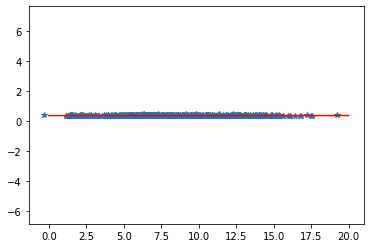

In [18]:
# Отрисуем получившуюся прямую. Используем для этого 100 точек.
p = np.linspace(0, 20, 100)
# Параметры вычисленной линии хранятся в переменной d.
y = poly.polyval(p, d )
y = y.reshape(100, 1)
plt.plot( data3[:,0], Gini, '*', p, y, 'r-')
plt.axis('equal')

Создадим нужные нам функции

In [19]:
def evalLine(d, x, i): # Создадим функцию, которая по параметрам прямой (d) считаем значение по строке вектора x с индексом i.  
    s1 = x.shape[0]
    x1 = np.concatenate( [np.ones((s1,1)), x.reshape( s1, 1) ], axis=1 )
    return np.dot(x1[i,:],d )

In [20]:
def evalLine1(d, x, i): # Создадим функцию, которая по параметрам прямой (d) считаем значение по строке вектора x с индексом i.  
    s1 = x.shape[0]     # Для случая с контрольными переменными
    s2 = x.shape[1]
    x1 = np.concatenate( [np.ones((s1,1)), x.reshape( s1, s2) ], axis=1 )
    return np.dot(x1[i,:],d )

In [21]:
def errLineCycle(d, x, y): # Функция для расчёта средней ошибки и средней квадратичной ошибки
    sum1 = 0.              # Без контрольных переменных
    sum2 = 0.
    for i in range(x.shape[0]):
        err = evalLine( d, x, i) - y[i]
        sum1 += err
        sum2 += err * err
    return sum1/x.shape[0], sum2/x.shape[0]

In [22]:
def errLineCycle1(d, x, y): # Функция для расчёта средней ошибки и средней квадратичной ошибки
    sum1 = 0.              # Для случая с контрольными переменными
    sum2 = 0.
    for i in range(x.shape[0]):
        err = evalLine1( d, x, i) - y[i]
        sum1 += err
        sum2 += err * err
    return sum1/x.shape[0], sum2/x.shape[0]

In [217]:
evalLine(d, data3[:,0],0)

array([0.38674475])

In [218]:
errLineCycle(d, data3[:,0], Gini)

(array([-1.95399252e-17]), array([0.00065029]))

Посчитаем коэффициенты с помощью функции opt.minimize. Должно получиться то же самое, что и предыдущим способом, так как задача МНК - минимизация квадрата

In [23]:
import scipy.optimize as opt

In [24]:
def errLineCycle2(d): # Функция для расчёта средней ошибки и средней квадратичной ошибки
             # Без контрольных переменных
    sum2  = 0.
    for i in range(data3[:,0].shape[0]):
        err = evalLine( d, data3[:,0], i) - Gini[i]
        sum2 += err * err
    return sum2/data3[:,0].shape[0]

In [221]:
opt.minimize( errLineCycle2, (-5,4), method="CG" )# Коэффициенты сошлись

     fun: 0.0006502854603236229
     jac: array([ 6.77156640e-06, -6.47763954e-07])
 message: 'Optimization terminated successfully.'
    nfev: 28
     nit: 3
    njev: 7
  status: 0
 success: True
       x: array([3.85225643e-01, 1.11116600e-04])

## Обучение и проверка

In [25]:
def experimentLin(x, y, d, p, k ):# Без контрольных переменных
    d0 = fitLin( x,y) 
    e0 = errLineCycle(d0, x, y) #считаем среднюю линейную ошибку и квадратичную
  
    ee10 = np.array([0.])
    ee11 = np.array([0.])
    ee20 = np.array([0.])
    ee21 = np.array([0.])
    ee30 = np.array([0.])
    ee31 = np.array([0.])
    for j in range(k): # k - количество прогонов
        perm = np.random.permutation( x.shape[0] ) #выбираем случайные индексы 
        ii = perm[:int(x.shape[0] * p)]# р-доля х-ов в обучающей выборке
        jj = perm[int(x.shape[0] * p):]
        d1 = fitLin( x[ii], y[ii]) #считаем оценки коэффициентов по мнк для подвыборки
        e1 = errLineCycle(d1, x, y)     #считаем линейную ошибку и квадратичную для всей выборки
        ee10 += e1[0]              #суммируем средние ошибки
        ee11 += e1[1]
        e2 = errLineCycle(d1, x[ii], y[ii])##считаем линейную ошибку и квадратичную по обучающим данным
        ee20 += e2[0]              #суммируем средние ошибки
        ee21 += e2[1]
        e3 = errLineCycle(d1, x[jj], y[jj])##считаем линейную ошибку и квадратичную по тестовым данным
        ee30 += e3[0]              #суммируем средние ошибки
        ee31 += e3[1]
    print ("МНК по всем данным")
    print("-"*90)
    print ("Средняя линейная и средняя квадратичная ошибки", e0)
    print("-"*90)
    print ("МНК по обучающим данным")
    print("-"*90)
    print ("Обучающая выборка")
    print ("Средняя линейная ошибка                      ", ee20 / k)
    print ("Средняя квадратичная ошибка                  ", ee21 / k)
    print("-"*90)
    print ("Тестовая выборка")
    print ("Средняя линейная ошибка                      ", ee30 / k)
    print ("Средняя квадратичная ошибка                  ", ee31 / k)
    print("-"*90)
    print ("Все данные")
    print ("Средняя линейная ошибка                      ", ee10 / k)
    print ("Средняя квадратичная ошибка                  ", ee11 / k)
        
    #print( e0, [ee10 / k, ee11 / k] ) #e0 - средняя линейная ошибка и квадратичная для всей выборки
    #ee10 / k - средняя линейная ошибка в k прогонах
    #ee11 / k - средняя квадратичная ошибка в k прогонах

In [26]:
def experimentLin1(x, y, d, p, k ): # для случая с контрольными переменными
    d0 = fitLin1( x,y) 
    e0 = errLineCycle1(d0, x, y) #считаем среднюю линейную ошибку и квадратичную
    ee20 = np.array([0.])
    ee21 = np.array([0.])
    ee30 = np.array([0.])
    ee10 = np.array([0.])
    ee11 = np.array([0.])
    ee31 = np.array([0.])
    for j in range(k): # k - количество прогонов
        perm = np.random.permutation( x.shape[0] ) #выбираем случайные индексы 
        ii = perm[:int(x.shape[0] * p)]# р-доля х-ов в обучающей выборке
        jj = perm[int(x.shape[0] * p):]
        d1 = fitLin1( x[ii], y[ii]) #считаем оценки коэффициентов по мнк для подвыборки
        e1 = errLineCycle1(d1, x, y)     #считаем среднюю линейную ошибку и квадратичную для всей выборки
        ee10 += e1[0]              #суммируем средние ошибки
        ee11 += e1[1]
        e2 = errLineCycle1(d1, x[ii], y[ii])##считаем линейную ошибку и квадратичную по обучающим данным
        ee20 += e2[0]              #суммируем средние ошибки
        ee21 += e2[1]
        e3 = errLineCycle1(d1, x[jj], y[jj])##считаем линейную ошибку и квадратичную по тестовым данным
        ee30 += e3[0]              #суммируем средние ошибки
        ee31 += e3[1]        
    print ("МНК по всем данным")
    print("-"*90)
    print ("Средняя линейная и средняя квадратичная ошибки", e0)
    print("-"*90)
    print ("МНК по обучающим данным")
    print("-"*90)
    print ("Обучающая выборка")
    print ("Средняя линейная ошибка                      ", ee20 / k)
    print ("Средняя квадратичная ошибка                  ", ee21 / k)
    print("-"*90)
    print ("Тестовая выборка")
    print ("Средняя линейная ошибка                      ", ee30 / k)
    print ("Средняя квадратичная ошибка                  ", ee31 / k)
    print("-"*90)
    print ("Все данные")
    print ("Средняя линейная ошибка                      ", ee10 / k)
    print ("Средняя квадратичная ошибка                  ", ee11 / k)

In [28]:
experimentLin(data3[:,0], Gini, d, 0.75, 1000)

МНК по всем данным
------------------------------------------------------------------------------------------
Средняя линейная и средняя квадратичная ошибки (array([-1.95399252e-17]), array([0.00065029]))
------------------------------------------------------------------------------------------
МНК по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя линейная ошибка                       [9.58014806e-17]
Средняя квадратичная ошибка                   [0.00065076]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя линейная ошибка                       [9.48620527e-06]
Средняя квадратичная ошибка                   [0.00065098]
------------------------------------------------------------------------------------------
Все данные
Средняя линейная ошибка                       [2.37787545e-06]
Средняя квадратичная ошибка                   [0.00065

## Графики

In [225]:
def Line(x, l):#Функция для построения графиков
    d = fitLin(x, Gini) 
    p = np.linspace(0, l, 100)
    x1 = np.concatenate( [np.ones((100,1)), p.reshape( 100, 1) ], axis=1 )
    y = np.dot(x1,d )
    y = y.reshape(100, 1)
    plt.plot( x, Gini, '*', p, y, 'r-')

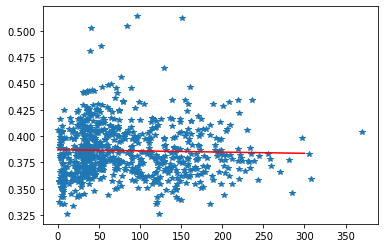

In [226]:
Line(data3[:,1], 300) # График зависимости к-та Джини от квадрата инфляции

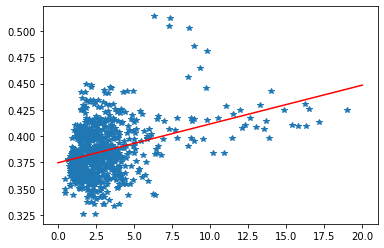

In [227]:
Line(data3[:,2], 20) # График зависимости к-та Джини от ВРП

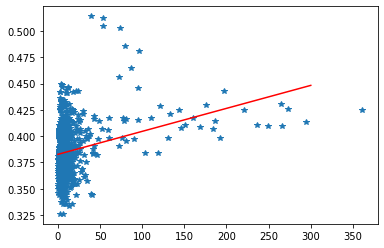

In [228]:
Line(data3[:,3], 300) # График зависимости к-та Джини от квадрата ВРП

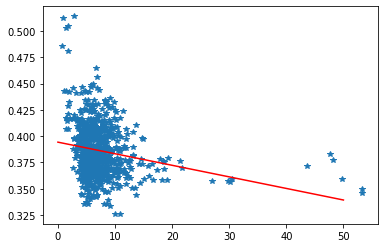

In [229]:
Line(data3[:,4], 50)# График зависимости к-та Джини от уровня безработицы

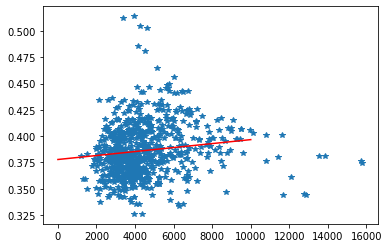

In [230]:
Line(data3[:,5], 10000) # График зависимости к-та Джини от годового размера социальной поддержки

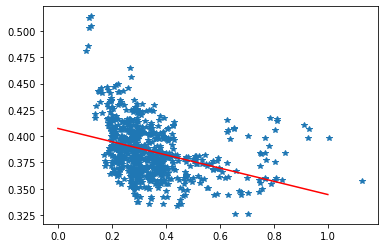

In [231]:
Line(data3[:,6], 1) # График зависимости к-та Джини от доли работников государственных органов и органов местного самоуправления

#### Модель 2.
Нужны контрольные переменные. Добавим все имеющиеся у нас переменные включая фиктивные переменные региона и периода (модель с фиксированными эффектами места и времени).

In [29]:
d1 = fitLin1( data3, Gini) 
print('Константа = ',d1[0])
print('Коэффициент перед Infl_all = ',d1[1]) # коэффициент перед инфляцией = 3.00262824e-04. Увеличилось влияние инфляции на неравенство

Константа =  [0.36024987]
Коэффициент перед Infl_all =  [0.00030026]


In [233]:
experimentLin1(data3, Gini, d1, 0.75, 1000) #интегральная ошибка стала гораздо меньше

МНК по всем данным
------------------------------------------------------------------------------------------
Средняя линейная и средняя квадратичная ошибки (array([2.81945578e-14]), array([0.00013459]))
------------------------------------------------------------------------------------------
МНК по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя линейная ошибка                       [-2.35884859e-15]
Средняя квадратичная ошибка                   [0.00012801]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя линейная ошибка                       [1.38186339e-05]
Средняя квадратичная ошибка                   [0.00018457]
------------------------------------------------------------------------------------------
Все данные
Средняя линейная ошибка                       [3.46387089e-06]
Средняя квадратичная ошибка                   [0.00014

#### Модель 3.
Оценим параметры регрессии с фиксированными эффектами региона.

In [30]:
d2 = fitLin1( data3[:,:-10], Gini) 
print('Константа = ',d2[0])
print('Коэффициент перед Infl_all = ',d2[1]) # коэффициент перед инфляцией = 2.01169300e-03

Константа =  [0.41822468]
Коэффициент перед Infl_all =  [0.00201169]


In [235]:
experimentLin1(data3[:,:-10], Gini, d2, 0.75, 1000) # в предыдущей модели ошибка была меньше

МНК по всем данным
------------------------------------------------------------------------------------------
Средняя линейная и средняя квадратичная ошибки (array([-1.51544259e-13]), array([0.00015327]))
------------------------------------------------------------------------------------------
МНК по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя линейная ошибка                       [-1.3712322e-14]
Средняя квадратичная ошибка                   [0.00014757]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя линейная ошибка                       [2.36833406e-05]
Средняя квадратичная ошибка                   [0.00020047]
------------------------------------------------------------------------------------------
Все данные
Средняя линейная ошибка                       [5.93662404e-06]
Средняя квадратичная ошибка                   [0.00016

#### Модель 4.
Оценим параметры регрессии с фиксированными эффектами времени.

In [31]:
data4 = pd.concat([data1, Dummies2], axis=1) 
data4.drop(['Gini','Year', 'Region'], inplace=True, axis=1)
data4 = data4.values

In [32]:
d4 = fitLin1( data4, Gini)
print('Константа = ',d4[0])
print('Коэффициент перед Infl_all = ',d4[1])  # коэффициент перед инфляцией = -5.67848754e-05

Константа =  [0.34351149]
Коэффициент перед Infl_all =  [-5.67848754e-05]


In [238]:
experimentLin1(data4, Gini, d4, 0.75, 1000) # опять большая интегральная ошибка

МНК по всем данным
------------------------------------------------------------------------------------------
Средняя линейная и средняя квадратичная ошибки (array([-3.34470229e-14]), array([0.00034021]))
------------------------------------------------------------------------------------------
МНК по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя линейная ошибка                       [6.87559835e-16]
Средняя квадратичная ошибка                   [0.00033759]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя линейная ошибка                       [2.57456315e-05]
Средняя квадратичная ошибка                   [0.00035883]
------------------------------------------------------------------------------------------
Все данные
Средняя линейная ошибка                       [6.45357163e-06]
Средняя квадратичная ошибка                   [0.00034

#### Модель 5.
Оценим параметры pooled-регрессии

In [33]:
d5 = fitLin1( data4[:,:-10], Gini)
print('Константа = ',d5[0])
print('Коэффициент перед Infl_all = ',d5[1])# коэффициент перед инфляцией =  5.08503154e-03

Константа =  [0.36234354]
Коэффициент перед Infl_all =  [0.00508503]


In [240]:
experimentLin1(data4[:,:-10], Gini, d5, 0.75, 1000) # опять большая интегральная ошибка

МНК по всем данным
------------------------------------------------------------------------------------------
Средняя линейная и средняя квадратичная ошибки (array([2.70672373e-15]), array([0.00043407]))
------------------------------------------------------------------------------------------
МНК по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя линейная ошибка                       [-1.17456983e-15]
Средняя квадратичная ошибка                   [0.00043234]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя линейная ошибка                       [-2.53863703e-05]
Средняя квадратичная ошибка                   [0.00044662]
------------------------------------------------------------------------------------------
Все данные
Средняя линейная ошибка                       [-6.36351683e-06]
Средняя квадратичная ошибка                   [0.000

#### Модель 6.
Построим регрессию без квадратов с фиксированными эффектами

In [34]:
data5 = data2[['Infl_all', 'GRP', 'Unempl', 'YAv_sub_real', 'G_s']]
data5 = pd.concat([data5, Dummies, Dummies2], axis=1) 
data5 = data5.values
data5

array([[13.59745644,  2.085481  ,  3.9       , ...,  0.        ,
         0.        ,  0.        ],
       [ 8.94532312,  1.990461  ,  4.7       , ...,  0.        ,
         0.        ,  0.        ],
       [ 9.02682662,  2.600156  ,  5.2       , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [11.05108497, 12.26152   ,  4.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 5.88166223, 13.543677  ,  3.5       , ...,  0.        ,
         1.        ,  0.        ],
       [ 2.81659385, 13.860853  ,  2.9       , ...,  0.        ,
         0.        ,  1.        ]])

In [35]:
d6 = fitLin1( data5, Gini)
print('Константа = ',d6[0])
print('Коэффициент перед Infl_all = ',d6[1])

Константа =  [0.36056892]
Коэффициент перед Infl_all =  [-0.00097653]


In [243]:
experimentLin1(data5, Gini, d6, 0.75, 1000) # в модели с квадратами ошибка была меньше

МНК по всем данным
------------------------------------------------------------------------------------------
Средняя линейная и средняя квадратичная ошибки (array([-2.7368959e-13]), array([0.00013516]))
------------------------------------------------------------------------------------------
МНК по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя линейная ошибка                       [-1.29290869e-13]
Средняя квадратичная ошибка                   [0.00012912]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя линейная ошибка                       [6.34176822e-05]
Средняя квадратичная ошибка                   [0.0001822]
------------------------------------------------------------------------------------------
Все данные
Средняя линейная ошибка                       [1.58966989e-05]
Средняя квадратичная ошибка                   [0.000142

Можно сделать вывод, что наилучшей моделью согласно идеологии машинного обучения, то есть моделью с наименьшей интегральной ошибкой, является модель с фиксированными эффектами времени и региона и квадратом ВРП и инфляции (модель 2). С помощью фиктивных переменных мы учли особенности каждого региона и временные шоки. 

### Модели с новыми ошибками

Попробуем оценить модели, приведённые выше, с использованием новых ошибок: придадим больший вес отрицательным ошибкам. Сначала зададим нужные нам функции 

In [244]:
def errLineCycle3(d, ii): # Функция для расчёта новых ошибок (мы хотим более пессимистичный прогноз)
                          # Без контрольных переменных
    sum2 = 0.
    for i in ii:
        err = evalLine( d, data3[:,0], i) - Gini[i]
        if err < 0:
            sum2 += 10*err**2 # у отрицательной ошибки больший вес
        else:
            sum2 += err**2
    return sum2/ii.shape[0]


In [245]:
def experimentLin3(x, y, d, p, k ):# Без контрольных переменных
    l = np.array([i for i in range(data3.shape[0])])
    d0 = opt.minimize( errLineCycle3, (0,0), args = (l), method="CG" ).x 
    e0 = errLineCycle3(d0, l) #считаем новую ошибку
    
    ee10 = np.array([0.])
    ee20 = np.array([0.])
    ee30 = np.array([0.])
    for j in range(k): # k - количество прогонов
        perm = np.random.permutation( x.shape[0] ) #выбираем случайные индексы 
        ii = perm[:int(x.shape[0] * p)]# р-доля х-ов в обучающей выборке
        d1 = opt.minimize( errLineCycle3, (0,0), args = (ii), method="CG" ).x #коэффициенты по обучающей выборке
        jj = perm[int(x.shape[0] * p):]
        e1 = errLineCycle3(d1, ii)##считаем новую ошибку по обучающим данным
        ee10 += e1              #суммируем средние ошибки
        e2 = errLineCycle3(d1, jj)##считаем ошибку по тестовым данным
        ee20 += e2              #суммируем средние ошибки
        e3 = errLineCycle3(d1, l)
        ee30 += e3              
    print ("Оптимизация по всем данным")
    print("-"*90)
    print ("Средняя ошибка                            ", e0)
    print("-"*90)
    print ("Оптимизация по обучающим данным")
    print("-"*90)
    print ("Обучающая выборка")
    print ("Средняя новая ошибка                      ", ee10 / k)
    print("-"*90)
    print ("Тестовая выборка")
    print ("Средняя новая ошибка                      ", ee20 / k)
    print("-"*90)
    print ("Все данные")
    print ("Средняя новая ошибка                      ", ee30 / k)


In [246]:
def errLineCycle4(d, x, ii): # Функция для расчёта новых ошибок (мы хотим более пессимистичный прогноз)
                          # С контрольными переменными
    sum2 = 0.
    for i in ii:
        err = evalLine1( d, x, i) - Gini[i]
        if err < 0:
            sum2 += 10*err**2 # у отрицательной ошибки больший вес
        else:
            sum2 += err**2
    return sum2/ii.shape[0]

In [247]:
def experimentLin4(x, y, d, p, k ):# С контрольными переменными
    l = np.array([i for i in range(data3.shape[0])])
    d0 = opt.minimize( errLineCycle4, d, args = (x, l), method="CG" ).x 
    e0 = errLineCycle4(d0, x, l) #считаем новую ошибку
    
    ee10 = np.array([0.])
    ee20 = np.array([0.])
    ee30 = np.array([0.])
    for j in range(k): # k - количество прогонов
        perm = np.random.permutation( x.shape[0] ) #выбираем случайные индексы 
        ii = perm[:int(x.shape[0] * p)]# р-доля х-ов в обучающей выборке
        d1 = opt.minimize( errLineCycle4, d, args = (x, ii), method="CG" ).x #коэффициенты по обучающей выборке
        jj = perm[int(x.shape[0] * p):]
        e1 = errLineCycle4(d1, x, ii)##считаем новую ошибку по обучающим данным
        ee10 += e1              #суммируем средние ошибки
        e2 = errLineCycle4(d1, x, jj)##считаем ошибку по тестовым данным
        ee20 += e2              #суммируем средние ошибки
        e3 = errLineCycle4(d1, x, l)
        ee30 += e3              
    print ("Оптимизация по всем данным")
    print("-"*90)
    print ("Средняя ошибка                            ", e0)
    print("-"*90)
    print ("Оптимизация по обучающим данным")
    print("-"*90)
    print ("Обучающая выборка")
    print ("Средняя новая ошибка                      ", ee10 / k)
    print("-"*90)
    print ("Тестовая выборка")
    print ("Средняя новая ошибка                      ", ee20 / k)
    print("-"*90)
    print ("Все данные")
    print ("Средняя новая ошибка                      ", ee30 / k)

##### Модель 1

In [248]:
experimentLin3(data3[:,0], Gini, d, 0.75, 10)  # мало прогонов, так как долго считается. Можно сделать больше

Оптимизация по всем данным
------------------------------------------------------------------------------------------
Средняя ошибка                             0.002268007467233202
------------------------------------------------------------------------------------------
Оптимизация по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя новая ошибка                       [0.0023412]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя новая ошибка                       [0.00206634]
------------------------------------------------------------------------------------------
Все данные
Средняя новая ошибка                       [0.00227231]


##### Модель 2

In [249]:
experimentLin4(data3, Gini, d1, 0.75, 10)

Оптимизация по всем данным
------------------------------------------------------------------------------------------
Средняя ошибка                             0.0007468616263646163
------------------------------------------------------------------------------------------
Оптимизация по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя новая ошибка                       [0.0007678]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя новая ошибка                       [0.00068426]
------------------------------------------------------------------------------------------
Все данные
Средняя новая ошибка                       [0.00074686]


##### Модель 3

In [250]:
experimentLin4(data3[:,:-10], Gini, d2, 0.75, 10) 

Оптимизация по всем данным
------------------------------------------------------------------------------------------
Средняя ошибка                             0.0008327524966736175
------------------------------------------------------------------------------------------
Оптимизация по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя новая ошибка                       [0.00086835]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя новая ошибка                       [0.00072634]
------------------------------------------------------------------------------------------
Все данные
Средняя новая ошибка                       [0.00083275]


##### Модель 4

In [251]:
experimentLin4(data4, Gini, d4, 0.75, 10)

Оптимизация по всем данным
------------------------------------------------------------------------------------------
Средняя ошибка                             0.0020916793334122665
------------------------------------------------------------------------------------------
Оптимизация по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя новая ошибка                       [0.00212514]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя новая ошибка                       [0.00199165]
------------------------------------------------------------------------------------------
Все данные
Средняя новая ошибка                       [0.00209168]


##### Модель 5

In [252]:
experimentLin4(data4[:,:-10], Gini, d5, 0.75, 10)

Оптимизация по всем данным
------------------------------------------------------------------------------------------
Средняя ошибка                             0.0026594972049117376
------------------------------------------------------------------------------------------
Оптимизация по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя новая ошибка                       [0.00268629]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя новая ошибка                       [0.00257941]
------------------------------------------------------------------------------------------
Все данные
Средняя новая ошибка                       [0.0026595]


##### Модель 6

In [253]:
experimentLin4(data5, Gini, d6, 0.75, 10) 

Оптимизация по всем данным
------------------------------------------------------------------------------------------
Средняя ошибка                             0.0007504987355657226
------------------------------------------------------------------------------------------
Оптимизация по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя новая ошибка                       [0.0007365]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя новая ошибка                       [0.00079235]
------------------------------------------------------------------------------------------
Все данные
Средняя новая ошибка                       [0.0007505]


Среди моделей, оценённых с использованием новой ошибки, наилучшие результаты на тестовых данных показала также вторая модель. Делаем вывод, что она лучшая с точки зрения идеологии машинного обучения.

### Регуляризация

In [44]:
def errLineCycle5(d, ii, L): # Функция для расчёта новых ошибок для гребневой (ридж) регрессии
                          # Без контрольных переменных
    sum1 = 0.
    for i in ii:
        err = evalLine( d, data3[:,0], i) - Gini[i]
        sum1 += err**2  # L - коэффициент регуляризации
    return sum1/ii.shape[0] + sum(L*d**2)


In [45]:
def experimentLin5(x, y, d, p, k, L ):# Без контрольных переменных
    l = np.array([i for i in range(data3.shape[0])])
    d0 = opt.minimize( errLineCycle5, (0,0), args = (l, L), method="SLSQP" ).x 
    e0 = errLineCycle5(d0, l, L) #считаем новую ошибку
    
    ee10 = np.array([0.])
    ee20 = np.array([0.])
    ee30 = np.array([0.])
    for j in range(k): # k - количество прогонов
        perm = np.random.permutation( x.shape[0] ) #выбираем случайные индексы 
        ii = perm[:int(x.shape[0] * p)]# р-доля х-ов в обучающей выборке
        d1 = opt.minimize( errLineCycle5, (0,0), args = (ii, L), method="SLSQP" ).x #коэффициенты по обучающей выборке
        jj = perm[int(x.shape[0] * p):]
        e1 = errLineCycle5(d1, ii, L)##считаем ошибку по обучающим данным
        ee10 += e1              #суммируем средние ошибки
        e2 = errLineCycle5(d1, jj, L)##считаем по тестовым данным
        ee20 += e2              #суммируем средние ошибки
        e3 = errLineCycle5(d1, l, L)
        ee30 += e3              
    print ("Оптимизация по всем данным")
    print("-"*90)
    print ("Средняя ошибка                            ", e0)
    print("-"*90)
    print ("Оптимизация по обучающим данным")
    print("-"*90)
    print ("Обучающая выборка")
    print ("Средняя новая ошибка                      ", ee10 / k)
    print("-"*90)
    print ("Тестовая выборка")
    print ("Средняя новая ошибка                      ", ee20 / k)
    print("-"*90)
    print ("Все данные")
    print ("Средняя новая ошибка                      ", ee30 / k)


Функции для моделей с контрольными переменными

In [46]:
def evalLine2(d, x):
    #x = list(x)                   # Создадим функцию, которая по параметрам прямой (d) считаем значение по строке вектора x с индексом i.  
    x1 = np.concatenate( [np.ones((1)), x[0]])
    return np.dot(x1,d ) #return np.dot(x1,d )[0]

In [47]:
def errLine(d, x, ii, L): # Функция для расчёта новых ошибок  для гребневой (ридж) регрессии
                          # С контрольными переменными
    sum = 0.
    xy = zip(x[ii,:], Gini[ii])
    err = list(map( lambda z : (evalLine2( d, z[0:-1]) - z[-1])**2 , xy))
    err = np.mean(err) + np.sum(L*d**2)
    return err

In [48]:
def experimentLin6(x, y, d, p, k , L):# С контрольными переменными
    l = np.array([i for i in range(data3.shape[0])])
    d0 = opt.minimize( errLine, d, args = (x, l, L), method="SLSQP" ).x 
    e0 = errLine(d0, x, l, L) #считаем новую ошибку
    
    ee10 = np.array([0.])
    ee20 = np.array([0.])
    ee30 = np.array([0.])
    for j in range(k): # k - количество прогонов
        perm = np.random.permutation( x.shape[0] ) #выбираем случайные индексы 
        ii = perm[:int(x.shape[0] * p)]# р-доля х-ов в обучающей выборке
        d1 = opt.minimize( errLine, d, args = (x, ii, L), method="SLSQP" ).x #коэффициенты по обучающей выборке
        jj = perm[int(x.shape[0] * p):]
        e1 = errLine(d1, x, ii, L)##считаем новую ошибку по обучающим данным
        ee10 += e1              #суммируем средние ошибки
        e2 = errLine(d1, x, jj, L)##считаем ошибку по тестовым данным
        ee20 += e2              #суммируем средние ошибки
        e3 = errLine(d1, x, l, L)
        ee30 += e3              
    print ("Оптимизация по всем данным")
    print("-"*90)
    print ("Средняя ошибка                            ", e0)
    print("-"*90)
    print ("Оптимизация по обучающим данным")
    print("-"*90)
    print ("Обучающая выборка")
    print ("Средняя новая ошибка                      ", ee10 / k)
    print("-"*90)
    print ("Тестовая выборка")
    print ("Средняя новая ошибка                      ", ee20 / k)
    print("-"*90)
    print ("Все данные")
    print ("Средняя новая ошибка                      ", ee30 / k)

##### Модель 1

In [271]:
experimentLin5(data3[:,0], Gini, d, 0.75, 100, 0.5)

Оптимизация по всем данным
------------------------------------------------------------------------------------------
Средняя ошибка                             0.0006502789178728657
------------------------------------------------------------------------------------------
Оптимизация по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя новая ошибка                       [0.00065186]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя новая ошибка                       [0.00064817]
------------------------------------------------------------------------------------------
Все данные
Средняя новая ошибка                       [0.00065093]


##### Модель 2

In [277]:
experimentLin6(data3, Gini, d1, 0.75, 100, 0.5)

Оптимизация по всем данным
------------------------------------------------------------------------------------------
Средняя ошибка                             -0.028371633789089343
------------------------------------------------------------------------------------------
Оптимизация по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя новая ошибка                       [-0.02837102]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя новая ошибка                       [-0.02837326]
------------------------------------------------------------------------------------------
Все данные
Средняя новая ошибка                       [-0.02837158]


##### Модель 3

In [279]:
experimentLin6(data3[:,:-10], Gini, d2, 0.75, 100, 0.5) 

Оптимизация по всем данным
------------------------------------------------------------------------------------------
Средняя ошибка                             -0.030412744770812204
------------------------------------------------------------------------------------------
Оптимизация по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя новая ошибка                       [-0.03041142]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя новая ошибка                       [-0.03041644]
------------------------------------------------------------------------------------------
Все данные
Средняя новая ошибка                       [-0.03041268]


##### Модель 4

In [266]:
experimentLin6(data4, Gini, d4, 0.75, 100, 0.5)

Оптимизация по всем данным
------------------------------------------------------------------------------------------
Средняя ошибка                             -0.0076311965642695025
------------------------------------------------------------------------------------------
Оптимизация по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя новая ошибка                       [-0.00762673]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя новая ошибка                       [-0.0076436]
------------------------------------------------------------------------------------------
Все данные
Средняя новая ошибка                       [-0.00763096]


##### Модель 5

In [267]:
experimentLin6(data4[:,:-10], Gini, d5, 0.75, 100, 0.5)

Оптимизация по всем данным
------------------------------------------------------------------------------------------
Средняя ошибка                             -0.002621957374281806
------------------------------------------------------------------------------------------
Оптимизация по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя новая ошибка                       [-0.00262243]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя новая ошибка                       [-0.00262002]
------------------------------------------------------------------------------------------
Все данные
Средняя новая ошибка                       [-0.00262183]


##### Модель 6

In [268]:
experimentLin6(data5, Gini, d6, 0.75, 100, 0.5) 

Оптимизация по всем данным
------------------------------------------------------------------------------------------
Средняя ошибка                             -0.025429899769046447
------------------------------------------------------------------------------------------
Оптимизация по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя новая ошибка                       [-0.02542836]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя новая ошибка                       [-0.02543426]
------------------------------------------------------------------------------------------
Все данные
Средняя новая ошибка                       [-0.02542984]


#### Лассо-регрессия

In [108]:
def errLineCycle7(d, ii, L): # Функция для расчёта новых ошибок для лассо регрессии
                          # Без контрольных переменных
    sum1 = 0.
    for i in ii:
        err = evalLine( d, data3[:,0], i) - Gini[i]
        sum1 += err**2
    err = sum1/ii.shape[0] + sum(L*abs(d))
    return err                    # L - коэффициент регуляризации


In [109]:
def experimentLin7(x, y, d, p, k, L ):# Без контрольных переменных
    l = np.array([i for i in range(data3.shape[0])])
    d0 = opt.minimize( errLineCycle7, (0,0), args = (l, L), method="SLSQP" ).x 
    e0 = errLineCycle7(d0, l, L) #считаем новую ошибку
    
    ee10 = np.array([0.])
    ee20 = np.array([0.])
    ee30 = np.array([0.])
    for j in range(k): # k - количество прогонов
        perm = np.random.permutation( x.shape[0] ) #выбираем случайные индексы 
        ii = perm[:int(x.shape[0] * p)]# р-доля х-ов в обучающей выборке
        d1 = opt.minimize( errLineCycle7, (0,0), args = (ii, L), method="SLSQP" ).x #коэффициенты по обучающей выборке
        jj = perm[int(x.shape[0] * p):]
        e1 = errLineCycle7(d1, ii, L)##считаем ошибку по обучающим данным
        ee10 += e1              #суммируем средние ошибки
        e2 = errLineCycle7(d1, jj, L)##считаем по тестовым данным
        ee20 += e2              #суммируем средние ошибки
        e3 = errLineCycle7(d1, l, L)
        ee30 += e3              
    print ("Оптимизация по всем данным")
    print("-"*90)
    print ("Средняя ошибка                            ", e0)
    print("-"*90)
    print ("Оптимизация по обучающим данным")
    print("-"*90)
    print ("Обучающая выборка")
    print ("Средняя новая ошибка                      ", ee10 / k)
    print("-"*90)
    print ("Тестовая выборка")
    print ("Средняя новая ошибка                      ", ee20 / k)
    print("-"*90)
    print ("Все данные")
    print ("Средняя новая ошибка                      ", ee30 / k)


In [89]:
def experimentLin9(x, y, d, p, k, L ):# Без контрольных переменных
    l = np.array([i for i in range(data3.shape[0])])
    d0 = opt.minimize( errLine0, (0,0), args = (x, l, L), method="SLSQP" ).x 
    e0 = errLineCycle7(d0, l, L) #считаем новую ошибку
    
    ee10 = np.array([0.])
    ee20 = np.array([0.])
    ee30 = np.array([0.])
    for j in range(k): # k - количество прогонов
        perm = np.random.permutation( x.shape[0] ) #выбираем случайные индексы 
        ii = perm[:int(x.shape[0] * p)]# р-доля х-ов в обучающей выборке
        d1 = opt.minimize( errLine0, (0,0), args = (x, ii, L), method="SLSQP" ).x #коэффициенты по обучающей выборке
        jj = perm[int(x.shape[0] * p):]
        e1 = errLineCycle7(d1, ii, L)##считаем ошибку по обучающим данным
        ee10 += e1              #суммируем средние ошибки
        e2 = errLineCycle7(d1, jj, L)##считаем по тестовым данным
        ee20 += e2              #суммируем средние ошибки
        e3 = errLineCycle7(d1, l, L)
        ee30 += e3              
    print ("Оптимизация по всем данным")
    print("-"*90)
    print ("Средняя ошибка                            ", e0)
    print("-"*90)
    print ("Оптимизация по обучающим данным")
    print("-"*90)
    print ("Обучающая выборка")
    print ("Средняя новая ошибка                      ", ee10 / k)
    print("-"*90)
    print ("Тестовая выборка")
    print ("Средняя новая ошибка                      ", ee20 / k)
    print("-"*90)
    print ("Все данные")
    print ("Средняя новая ошибка                      ", ee30 / k)


In [117]:
def errLine1(d, x, ii, L): # Функция для расчёта новых ошибок  для лассо регрессии
                          # С контрольными переменными
    xy = zip(x[ii,:], Gini[ii])
    err = list(map( lambda z : (evalLine2( d, z[0:-1]) - z[-1])**2 , xy))
    err = np.mean(err) + np.sum(L*np.abs(d))
    return err

In [120]:
def experimentLin8(x, y, d, p, k , L):# С контрольными переменными
    l = np.array([i for i in range(data3.shape[0])])
    d0 = opt.minimize( errLine1, d, args = (x, l, L), method="SLSQP" ).x 
    e0 = errLine1(d0, x, l, L) #считаем новую ошибку
    
    ee10 = np.array([0.])
    ee20 = np.array([0.])
    ee30 = np.array([0.])
    for j in range(k): # k - количество прогонов
        perm = np.random.permutation( x.shape[0] ) #выбираем случайные индексы 
        ii = perm[:int(x.shape[0] * p)]# р-доля х-ов в обучающей выборке
        d1 = opt.minimize( errLine1, d, args = (x, ii, L), method="SLSQP" ).x #коэффициенты по обучающей выборке
        jj = perm[int(x.shape[0] * p):]
        e1 = errLine1(d1, x, ii, L)##считаем новую ошибку по обучающим данным
        ee10 += e1              #суммируем средние ошибки
        e2 = errLine1(d1, x, jj, L)##считаем ошибку по тестовым данным
        ee20 += e2              #суммируем средние ошибки
        e3 = errLine1(d1, x, l, L)
        ee30 += e3              
    print ("Оптимизация по всем данным")
    print("-"*90)
    print ("Средняя ошибка                            ", e0)
    print("-"*90)
    print ("Оптимизация по обучающим данным")
    print("-"*90)
    print ("Обучающая выборка")
    print ("Средняя новая ошибка                      ", ee10 / k)
    print("-"*90)
    print ("Тестовая выборка")
    print ("Средняя новая ошибка                      ", ee20 / k)
    print("-"*90)
    print ("Все данные")
    print ("Средняя новая ошибка                      ", ee30 / k)

##### Модель 1

In [110]:
experimentLin7(data3[:,0], Gini, d, 0.75, 100, 0.5)

Оптимизация по всем данным
------------------------------------------------------------------------------------------
Средняя ошибка                             0.04346795397944668
------------------------------------------------------------------------------------------
Оптимизация по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя новая ошибка                       [0.04338217]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя новая ошибка                       [0.04375606]
------------------------------------------------------------------------------------------
Все данные
Средняя новая ошибка                       [0.04347589]


##### Модель 2

In [121]:
experimentLin8(data3, Gini, d1, 0.75, 100, 0.5)

KeyboardInterrupt: 

##### Модель 3

In [284]:
experimentLin8(data3[:,:-10], Gini, d2, 0.75, 100, 0.5) 

Оптимизация по всем данным
------------------------------------------------------------------------------------------
Средняя ошибка                             -45290008.89720872
------------------------------------------------------------------------------------------
Оптимизация по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя новая ошибка                       [-0.72899154]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя новая ошибка                       [-0.7289932]
------------------------------------------------------------------------------------------
Все данные
Средняя новая ошибка                       [-0.72899196]


##### Модель 4

In [288]:
experimentLin8(data4, Gini, d4, 0.75, 100, 0.5)

Оптимизация по всем данным
------------------------------------------------------------------------------------------
Средняя ошибка                             -0.20032233749707226
------------------------------------------------------------------------------------------
Оптимизация по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя новая ошибка                       [-0.2003209]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя новая ошибка                       [-0.20032492]
------------------------------------------------------------------------------------------
Все данные
Средняя новая ошибка                       [-0.20032191]


##### Модель 5

In [286]:
experimentLin8(data4[:,:-10], Gini, d5, 0.75, 100, 0.5)

Оптимизация по всем данным
------------------------------------------------------------------------------------------
Средняя ошибка                             -5.363967752820778
------------------------------------------------------------------------------------------
Оптимизация по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя новая ошибка                       [-0.04557862]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя новая ошибка                       [-0.04556599]
------------------------------------------------------------------------------------------
Все данные
Средняя новая ошибка                       [-0.04557545]


##### Модель 6

In [294]:
experimentLin8(data5, Gini, d6, 0.75, 100, 0.5) 

Оптимизация по всем данным
------------------------------------------------------------------------------------------
Средняя ошибка                             -14106266.873570902
------------------------------------------------------------------------------------------
Оптимизация по обучающим данным
------------------------------------------------------------------------------------------
Обучающая выборка
Средняя новая ошибка                       [2.32129953e+19]
------------------------------------------------------------------------------------------
Тестовая выборка
Средняя новая ошибка                       [2.66843866e+19]
------------------------------------------------------------------------------------------
Все данные
Средняя новая ошибка                       [2.40831574e+19]
